<a href="https://colab.research.google.com/github/KeerthanaHM36/Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
import pickle



In [ ]:
df=pd.read_csv('/content/breast-cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
px.histogram(data_frame=df,x='diagnosis',color='diagnosis',color_discrete_sequence=['red','green'])

In [ ]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [ ]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [ ]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [ ]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [ ]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [ ]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [ ]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [ ]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [ ]:
# @title Data Preprocessing
df.drop(['id'],axis=1,inplace=True)


In [ ]:
df['diagnosis']=(df['diagnosis']=='M').astype('int')

In [ ]:
corr = df.corr()

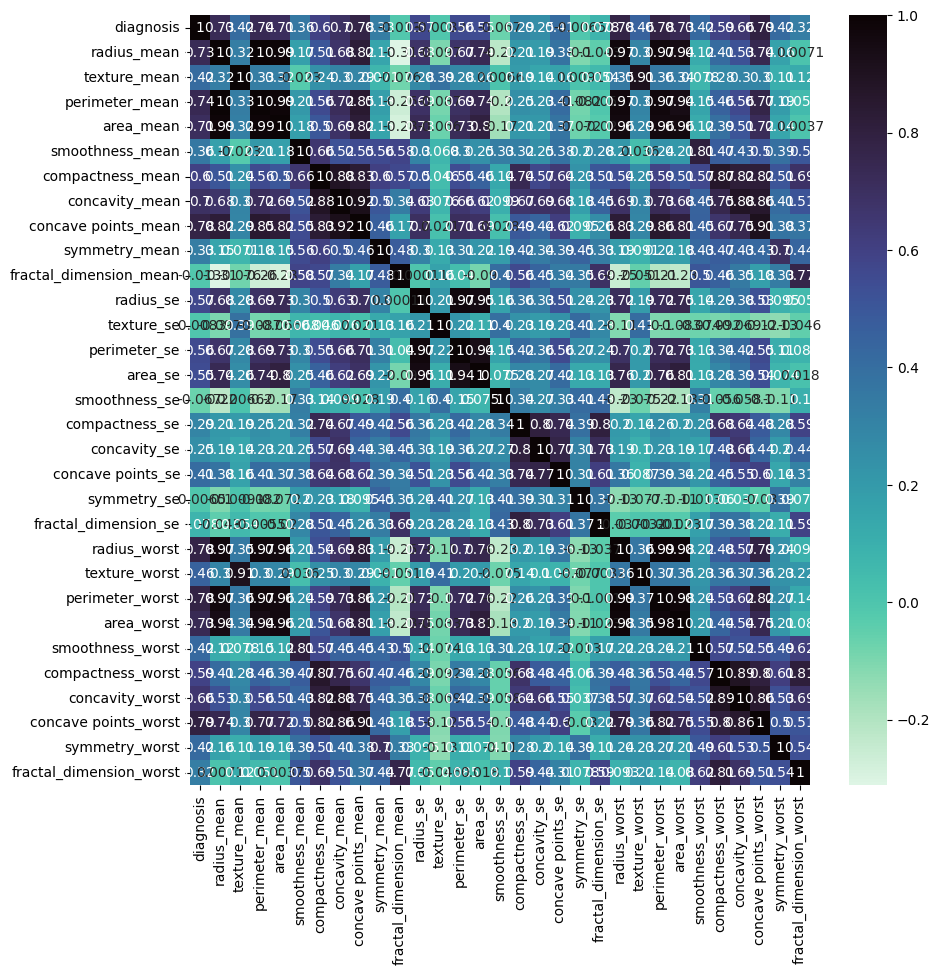

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='mako_r')
plt.show()

In [ ]:
cor_target=abs(corr['diagnosis'])
relevant_features=cor_target[cor_target>0.2]
names=relevant_features.index
names=names.drop('diagnosis')
pprint.pprint(names)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
x=df[names].values
y=df['diagnosis'].values

In [ ]:
def train_test_split(x,y,test_size=0.2,random_state=42):
  n_samples =x.shape[0]
  np.random.seed(random_state)
  shuffled_indices=np.random.permutation(n_samples)
  test_set_size=int(n_samples*test_size)

  test_indices=shuffled_indices[ :test_set_size]
  train_indices=shuffled_indices[test_set_size:]

  x_train,x_test=x[train_indices],x[test_indices]
  y_train,y_test=y[train_indices],y[test_indices]

  return x_train,x_test,y_train,y_test

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y)

In [ ]:
# @title Standardize the data
def standardize(x_train,x_test):
  mean=x_train.mean(axis=0)
  std=x_train.std(axis=0)
  x_train=(x_train-mean)/std
  x_test=(x_test-mean)/std
  return x_train,x_test
x_train,x_test=standardize(x_train,x_test)


In [ ]:
# @title Model Implementation
def sigmoid(z):
  return 1/(1+np.exp(-z))


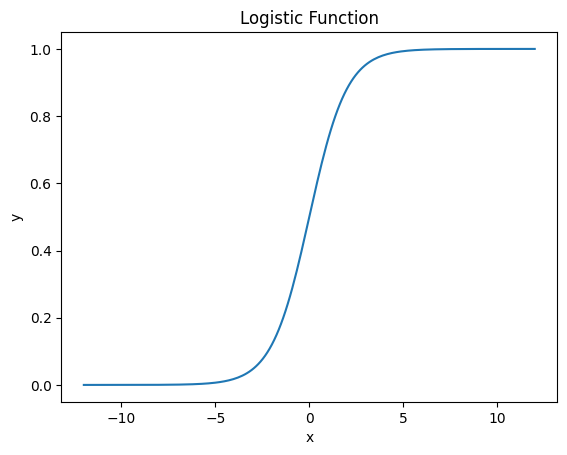

In [ ]:
z=np.linspace(-12,12,200)
plt.plot(z,sigmoid(z))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Function')
plt.show()

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Delete the variable named 'print' that is causing the error
if 'print' in globals() and isinstance(print, tuple):
    del print

In [ ]:
# @title Prediction and Evaluate
predictions=model.predict(x_test)
predictions_info=("predictions :" , predictions[:5])
print(predictions_info)
print("actual :" , y_test[:5])
print ("accuracy :" , model.score(x_test,y_test))

('predictions :', array([0, 1, 1, 0, 0]))
actual : [0 1 1 0 0]
accuracy : 0.9734513274336283
